## Business Context

The advent of e-news, or electronic news, portals has offered us a great opportunity to quickly get updates on the day-to-day events occurring globally. The information on these portals is retrieved electronically from online databases, processed using a variety of software, and then transmitted to the users. There are multiple advantages of transmitting new electronically, like faster access to the content and the ability to utilize different technologies such as audio, graphics, video, and other interactive elements that are either not being used or aren’t common yet in traditional newspapers.

E-news Express, an online news portal, aims to expand its business by acquiring new subscribers. With every visitor to the website taking certain actions based on their interest, the company plans to analyze these actions to understand user interests and determine how to drive better engagement.  The executives at E-news Express are of the opinion that there has been a decline in new monthly subscribers compared to the past year because the current webpage is not designed well enough in terms of the outline & recommended content to keep customers engaged long enough to make a decision to subscribe.



## Objective

The design team of the company has researched and created a new landing page that has a new outline & more relevant content shown compared to the old page. In order to test the effectiveness of the new landing page in gathering new subscribers, the Data Science team conducted an experiment by randomly selecting 100 users and dividing them equally into two groups. The existing landing page was served to the first group (control group) and the new landing page to the second group (treatment group). Data regarding the interaction of users in both groups with the two versions of the landing page was collected. Being a data scientist in E-news Express, you have been asked to explore the data and perform a statistical analysis (at a significance level of 5%) to determine the effectiveness of the new landing page in gathering new subscribers for the news portal by answering the following questions:

1. Do the users spend more time on the new landing page than on the existing landing page?

2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

3. Does the converted status depend on the preferred language?

4. Is the time spent on the new page the same for the different language users?


## Data Dictionary

The data contains information regarding the interaction of users in both groups with the two versions of the landing page.

1. `user_id` - Unique user ID of the person visiting the website

2. `group` - Whether the user belongs to the first group (control) or the second group (treatment)

3. `landing_page` - Whether the landing page is new or old

4. `time_spent_on_the_page` - Time (in minutes) spent by the user on the landing page

5. `converted` - Whether the user gets converted to a subscriber of the news portal or not

6. `language_preferred` - Language chosen by the user to view the landing page

## Data Overview

In [4]:
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [5]:
df.tail()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


In [6]:
df.shape

(100, 6)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


In [8]:
df.isnull().sum()

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

In [9]:
df[df.duplicated()]

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred


In [10]:
df.describe(include='all')

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
count,100.000000,100,100,100.000000,100,100
unique,NaN,2,2,NaN,2,3
top,NaN,control,old,NaN,yes,Spanish
freq,NaN,50,50,NaN,54,34
mean,546517.000000,NaN,NaN,5.377800,NaN,NaN
std,52.295779,NaN,NaN,2.378166,NaN,NaN
min,546443.000000,NaN,NaN,0.190000,NaN,NaN
25%,546467.750000,NaN,NaN,3.880000,NaN,NaN
50%,546492.500000,NaN,NaN,5.415000,NaN,NaN
75%,546567.250000,NaN,NaN,7.022500,NaN,NaN


#### Observations

1. A total of 100 entries for each of the total 6 columns of data.
2. No missing values detected in this data frame.
3. No duplicated entries detected as well.
4. `user_id` and `time_spent_on_the_page` columns are numerical, integer and floating type respectively.
5. `group`, `landing page`, `converted` and `language_preferred` columns are categorical.
6. `user_id` is a unique ID to a particular customer and may be not of interest in this analysis.
7. `group` split half among the 100, namely 50 in control group and 50 in treatment group.
8. `landing_page` is which the old landing page users belongs to the control group, and new landing page users belongs to the treatment group, as designed by the Data Science team.
9. Time spent on the users' respective landing page in this dataset has an average of about 5.38 minutes, fairly close to the median of 5.42 minutes. Maximum stay is about 10.7 minutes, while minimum at a quick 0.19 minutes. No skewness or outliers detected at first sight.
10. 54 users were seen to be converted while the remaining 46 stays with their own preferred landing page.
11. 3 unique type of language, namely English, Spanish and French.

### Univariate Analysis

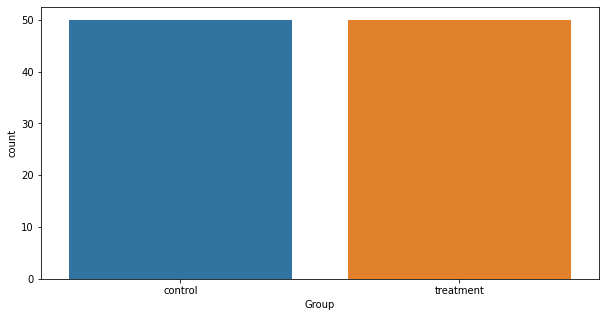

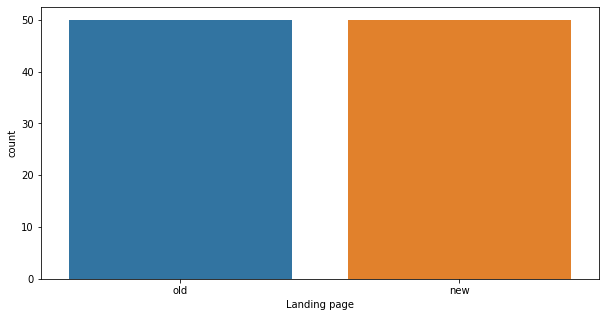

In [11]:
plt.figure(figsize=(10,5));
sns.countplot(data=df,x='group');
plt.xlabel('Group')
plt.show();

plt.figure(figsize=(10,5));
sns.countplot(data=df,x='landing_page'); 
plt.xlabel('Landing page')
plt.show();

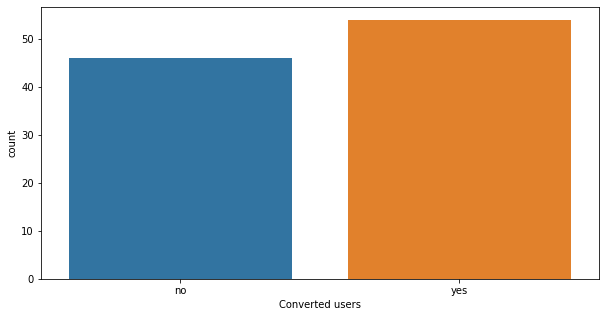

In [12]:
plt.figure(figsize=(10,5));
sns.countplot(data=df,x='converted'); 
plt.xlabel('Converted users')
plt.show();

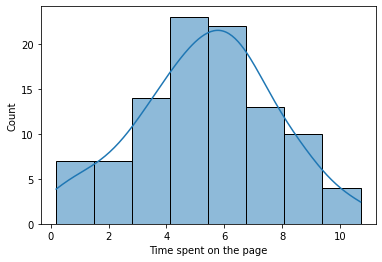

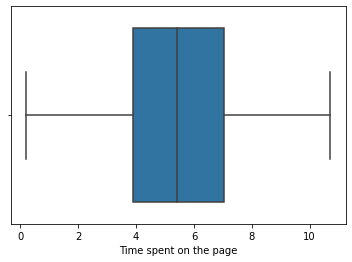

In [13]:
sns.histplot(data=df,x='time_spent_on_the_page',kde=True); 
plt.xlabel('Time spent on the page')
plt.show();
sns.boxplot(data=df,x='time_spent_on_the_page');
plt.xlabel('Time spent on the page')
plt.show();

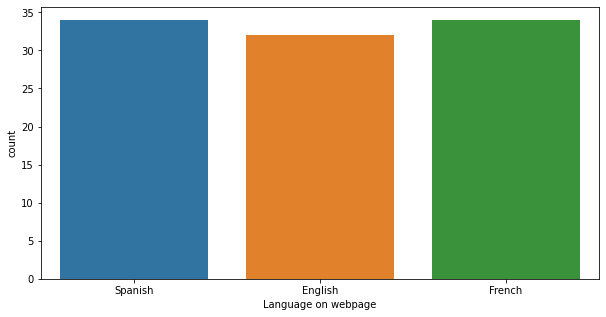

In [14]:
plt.figure(figsize=(10,5));
sns.countplot(data=df,x='language_preferred'); 
plt.xlabel('Language on webpage')
plt.show();

In [15]:
df['language_preferred'].value_counts()

Spanish    34
French     34
English    32
Name: language_preferred, dtype: int64

#### Observations

1. Control group contains users on the old webpage, treatment group contains users on the new webpage as intended.
2. 54 users converted to subscriber, while 46 users didn't it.
2. The distribution of time spent on landing page looks normally distributed. No outliers detected.
3. There are 34 users prefer Spanish and also 34 users prefer French in the news portal. While the remaining 32 users prefer English.

### Bivariate Analysis

The variable of interest is `time_spent_on_the_page`.

**1) Start off looking at relationship with `landing_page`**

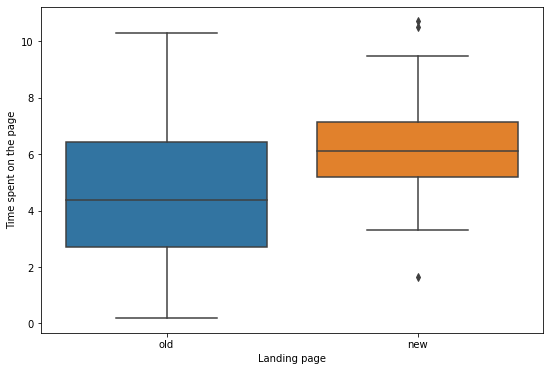

In [16]:
plt.figure(figsize=(9, 6))
sns.boxplot(data=df,y='time_spent_on_the_page', x='landing_page');
plt.ylabel('Time spent on the page')
plt.xlabel('Landing page')
plt.show();

margplot = px.density_heatmap(df, x="landing_page",y="time_spent_on_the_page", marginal_x="histogram", marginal_y="histogram",
                              labels={
                                  "time_spent_on_the_page": "Time spent on the page",
                                  "landing_page": "Landing page",
                              });
margplot.show();

**2) Looking at relationship with `converted`**

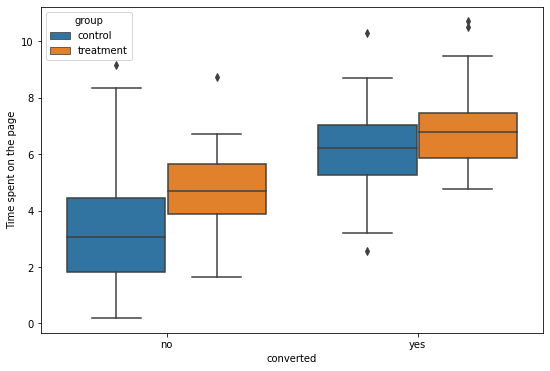

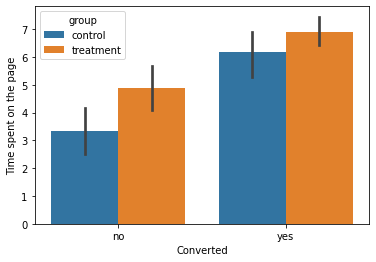

In [17]:
plt.figure(figsize=(9, 6))
sns.boxplot(data=df,y='time_spent_on_the_page', x='converted',hue='group');
plt.ylabel('Time spent on the page')
plt.xlabel('converted')
plt.show();

sns.barplot(data=df,y='time_spent_on_the_page',x='converted',hue='group')
plt.ylabel('Time spent on the page')
plt.xlabel('Converted')
plt.show()

**3) Looking at relationship with `language_preferred`**

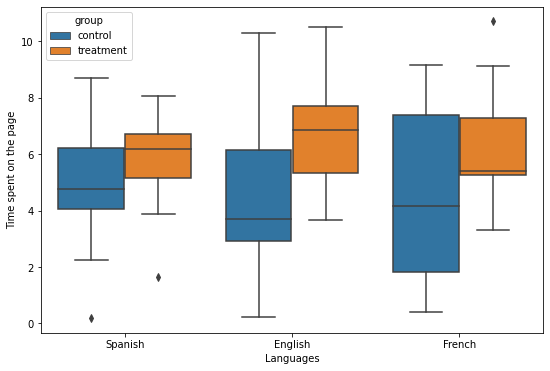

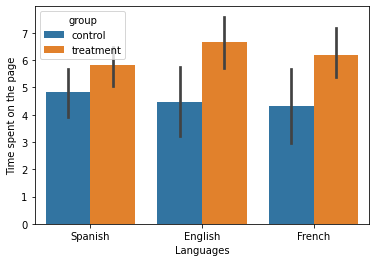

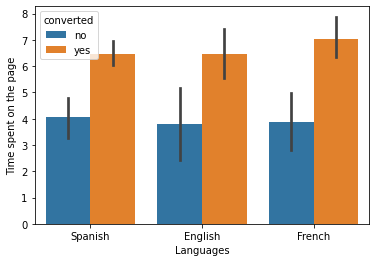

In [18]:
plt.figure(figsize=(9, 6))
sns.boxplot(data=df,y='time_spent_on_the_page', x='language_preferred',hue='group');
plt.ylabel('Time spent on the page')
plt.xlabel('Languages')
plt.show();

sns.barplot(data=df,y='time_spent_on_the_page',x='language_preferred',hue='group')
plt.ylabel('Time spent on the page')
plt.xlabel('Languages')
plt.show()

sns.barplot(data=df,y='time_spent_on_the_page',x='language_preferred',hue='converted')
plt.ylabel('Time spent on the page')
plt.xlabel('Languages')
plt.show()

#### Observations:

##### `time_spent_on_the_page` vs `landing_page`
1. 50% of users in the treatment group has a median time spent of around 6 minutes on the new webpage. Some outliers are detected in the treatment group.
2. While 50% of users in the control group generally spend lesser time compared to the treatment group, a median of around 4.3 minutes on the old webpage.
3. A peak between 4 - 8 minutes can be seen on users using the new webpage. On the other hand, the distribution is much more spread out on the old webpage, having a lower peak between 2 - 6 minutes. 

##### `time_spent_on_the_page` vs `converted`
4. Users who converted spend longer time on their respective webpage compared to those who didn't.
5. Whether users converted or not, the time spent on new webpage is longer than on old webpage.

##### `time_spent_on_the_page` vs `language_preferred`
6. Again we can see regardless of which language, the time spent in the treatment group is higher than the control group.
7. In both the control and treatment group, there is a minor difference on the time spent between the language preferred.
8. It is apparent that those who converted spend more time on their respective webpage compared to those who didn't, regardless of which language preferred.

### Perform Visual Analysis

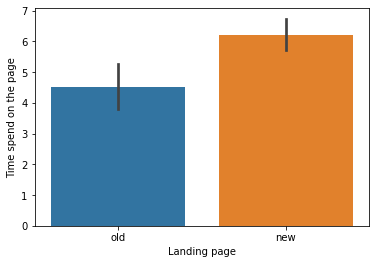

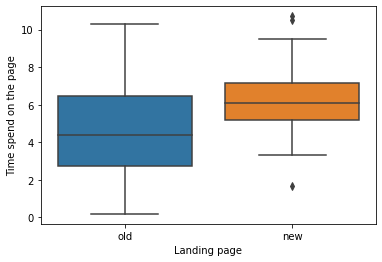

In [19]:
sns.barplot(data=df,x='landing_page',y='time_spent_on_the_page')
plt.xlabel('Landing page')
plt.ylabel('Time spend on the page')
plt.show()

sns.boxplot(data=df,x='landing_page',y='time_spent_on_the_page')
plt.xlabel('Landing page')
plt.ylabel('Time spend on the page')
plt.show()

* Visually, users generally spend more time on the new landing page compared to the old webpage.

Let $t_i$, where $i=\{old, new\}$, be the time spent on the respective version of the landing page. Also let $\mu_t$ be our average time spent on the landing page.

>$H_0: \mu_{t_{new}} \leq \mu_{t_{old}}$

>$H_a: \mu_{t_{new}} > \mu_{t_{old}}$ 

This is a one-tailed (right-tail) test for comparing the means from two independent population. The population standard deviation is unknown. Hence a 2 sample t-test will be used for hypothesis testing.

Let our significance level $\alpha = 0.05$.

Starting off finding the sample mean and standard deviation for the two samples

In [20]:
control = df[df.group == 'control'] # extract data belongs to the control group
treatment = df[df.group == 'treatment'] # extract data belongs to the treatment group

# printing the means and standard deviations
print('The mean time spent on the control group is ' + str(round(control.time_spent_on_the_page.mean(),2)))
print('The mean time spent on the treatment group is ' + str(round(treatment.time_spent_on_the_page.mean(),2)))
print('The standard deviation of time spent on the control group is ' + str(round(control.time_spent_on_the_page.std(),2)))
print('The standard deviation of time spent on the treatment group is ' + str(round(treatment.time_spent_on_the_page.std(),2)))

The mean time spent on the control group is 4.53
The mean time spent on the treatment group is 6.22
The standard deviation of time spent on the control group is 2.58
The standard deviation of time spent on the treatment group is 1.82


* The sample standard deviation is not equal.

In [21]:
# find the p-value
test_stat, p_value = ttest_ind(treatment.time_spent_on_the_page, control.time_spent_on_the_page, equal_var = False, alternative = 'greater')
print('The p-value is ', p_value)

The p-value is  0.0001392381225166549


The computed p-value, ~0.00014, is less than our specified significance level 5%.

We have enough evidence to reject the null hypothesis, that is, there is enough evidence that users spend more time on the new landing page compared to the old one.

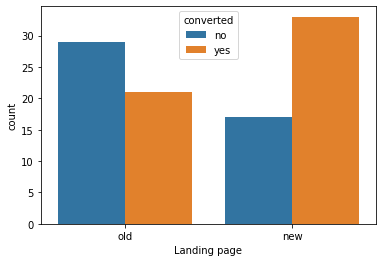

In [22]:
sns.countplot(data=df,x='landing_page',hue='converted')
plt.xlabel('Landing page')
plt.show()

We can see on the orange bar visually, the conversion for the new page is greater than for the old page.

Let $C_{new}$ be the conversion rate of the proportion of users converted to subscriber in new page and $C_{old}$ for those converted in the old page.

>$H_0: C_{new} \leq C_{old}$

>$H_a: C_{new} > C_{old}$ 

This is a 2 sample proportion type of test we are interested in. Hence a two proportion Z-test is used for hypothesis testing.

Let our significance level $\alpha = 0.05$.

In [23]:
df.groupby('landing_page')['converted'].value_counts()

landing_page  converted
new           yes          33
              no           17
old           no           29
              yes          21
Name: converted, dtype: int64

In [24]:
n = 50  # total number of samples in each respective landing page which are the same as designed.
p_1 = 33 # number of those converted to subscriber in new webpage
p_2 = 21 # number of those converted to subscriber in old webpage

print('The proportion of converted in new webpage is ', p_1/n)
print('The proportion of converted in old webpage is ', p_2/n)

The proportion of converted in new webpage is  0.66
The proportion of converted in old webpage is  0.42


In [25]:
# set the counts of converted users
conversion_count = np.array([p_1, p_2])

# set the sample sizes
nobs = np.array([n, n])

# find the p-value
stat, pval = proportions_ztest(conversion_count , nobs, alternative = 'larger')
print('The p-value is ' + str(p_value))

The p-value is 0.0001392381225166549


The p-value, ~0.00014, is less than our specified $\alpha$. Hence we have enough evidence to reject our null hypothesis. Our hypothesis test found evidence that the conversion rate for the new page is indeed greater than the conversion rate for the old page.

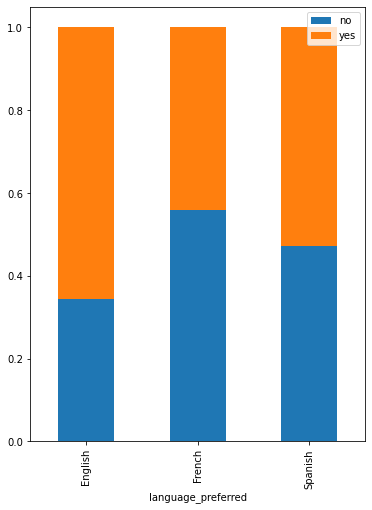

In [26]:
# produce a contingency table then plot a stacked bar plot
pd.crosstab(df['language_preferred'],df['converted'],normalize='index').plot(kind="bar", figsize=(6,8), stacked=True)
plt.legend()
plt.show()

* Apart from English users which show a slight dependence, French and Spanish users doesn't seem to show dependencies.

>$H_0:$ the conversion is independent to preferred language

>$H_a:$ the conversion is dependent to preferred language

A chi-square test of independence is the desired test we shall use here for our two categorical variables.

Let our significance level $\alpha$ be 0.05.

In [27]:
# creating a contingency_table
contingency_table = pd.crosstab(df.converted, df.language_preferred,rownames=['converted'], colnames=['language_preferred'])
contingency_table

language_preferred,English,French,Spanish
converted,,,
no,11,19,16
yes,21,15,18


In [28]:
# find the p-value
chi, p_value, dof, expected = chi2_contingency(contingency_table)
print('The p-value is', p_value)

The p-value is 0.21298887487543447


The computed p-value, ~0.21, is larger than $\alpha$, hence we have not enough evidence to reject the null. Our test found evidence that conversion is independent to the language preferred by users.

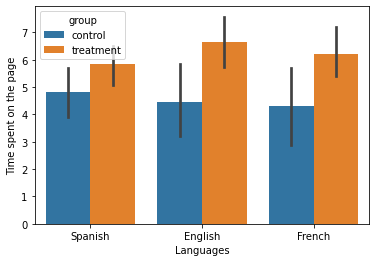

In [29]:
sns.barplot(data=df,y='time_spent_on_the_page',x='language_preferred',hue='group')
plt.ylabel('Time spent on the page')
plt.xlabel('Languages')
plt.show()

In [30]:
# compute average time spent on new webpage for different language users
newpage = df[df['group']=='treatment']
newpage.groupby('language_preferred')['time_spent_on_the_page'].mean()

language_preferred
English    6.663750
French     6.196471
Spanish    5.835294
Name: time_spent_on_the_page, dtype: float64

* The time spent on the new page (treatment group) visually shows a minor difference for different language users. 
* The calculated average time spent for the 3 languages ranges between 5.8 to 6.6 minutes
* Descriptively difficult to draw a statement. We proceed with the infrential way.

let $\mu_i$, where $i=\{English,Spanish,French\}$ be our average time spent on $i$ language users on the new landing page.

>$H_0: \mu_{English} = \mu_{Spanish} = \mu_{French}$

>$H_a:$ at least one of the average time spent is different from the other.

One-way ANOVA F-test is used for our hypothesis test on three population mean.

Let our significance level $\alpha$ be 0.05

In [31]:
dfnew = df[df['landing_page']=='new'] # extract users on new landing page

# categorize extacted data into 3 languages
time_eng = dfnew[dfnew['language_preferred']=='English']['time_spent_on_the_page']
time_spa = dfnew[dfnew['language_preferred']=='Spanish']['time_spent_on_the_page']
time_fre = dfnew[dfnew['language_preferred']=='French']['time_spent_on_the_page']

#### Shapiro-Wilk’s test

We will test the null hypothesis

>$H_0:$ Time spent on the new page follows a normal distribution against

against the alternative hypothesis

>$H_a:$ Time spent on the new page does not follow a normal distribution

In [32]:
# Assumption 1: Normality
w, p_value = stats.shapiro(dfnew['time_spent_on_the_page']) 
# find the p-value
print('The p-value is', p_value)

The p-value is 0.8040016293525696


* p-value is larger than $\alpha$. We have not enough evidence to reject the null under 5% significance level. Hence, the variable `time_spent_on_the_page` follows a normal distribution.

#### Levene’s test

We will test the null hypothesis

>$H_0$: All the population variances are equal

against the alternative hypothesis

>$H_a$: At least one variance is different from the rest

In [33]:
#Assumption 2: Homogeneity of Variance
statistic, p_value = levene( time_eng, 
                                time_spa, 
                                time_fre)
# find the p-value
print('The p-value is', p_value)

The p-value is 0.46711357711340173


* p-value is larger than $\alpha$. We have not enough evidence to reject the null under 5% significance level. Hence, we have homogeneity of variance.

###### The assumptions of ANOVA is satistied, we proceed to the hypothesis testing.

In [34]:
# perform one-way anova test
test_stat, p_value = f_oneway(time_eng,
                              time_spa,
                              time_fre)
# find the p-value
print('The p-value is ' + str(p_value))

The p-value is 0.43204138694325955


The p-value is larger than our significance level $\alpha$, hence we fail to reject the null. In other words, the average time spent on the new page is the same for different language users.

## Conclusion and Business Recommendations

###### Conclusions from analysis:
* There is enough evidence that users spend more time on the new landing page compared to the old one.
* There is also good evidence that the conversion rate for the new page is greater than the conversion rate for the old page.
* Users who converted spend longer time on their respective webpage compared to those who didn't.
* Evidence shows that conversion is independent to the language preferred by users.
* The last evidence shows that the average time spent on the new page is the same for different language users.

###### Final conclusions:
* Based on the objective questions, the new landing page turns out to be effective in gathering new subscribers.
* It also did attract users to stay longer on the new webpage.
* Also users who subscribed seems to be positive and satisfied, moreover the fact that new webpage converted users spends more time on it than the old webpage converted users.

###### Recommendations:
* Although the analysis seems to show a positive effect but certainly not by a big margin. As seen from the bar plot before there are still fair amount of users who were not converted (46 users).
* First recommendation could be the cost of subscription. A through analysis should be done.
* Next could be the visibility/accessibility/transparency of subscription information, i.e. where the link is located, is it too much steps to get to it, what's included in the package.
* Further discussion about the design of the webpage if there could be some more improvements.
* Based on the language available, although it is found to be independent to being converted, it seems to cater for mostly European users, so allowing more news content in Europe could be an option, but of course not omitting international news.
* Final recommendation could be introducing a bonus from accumulating time spent on the webpage. This bonus can then receive certain discounts for different subscription packages.

___